# Financial Reports Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import requests
import xmltodict

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
#load data from xml_links folder

main_path = r'/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/xml_links/'

#load data from xml_links folder
def load_data(main_path):
    data = pd.DataFrame(columns=['CVR', 'PublicationDate', 'UrlXML'])
    for i in range(2013, 2024):
        path = main_path + str(i) + '.csv'
        print(path)
        df = pd.read_csv(path, index_col=0)
        data = pd.concat([data, df])
    return data

In [3]:
load_data(main_path)

/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/xml_links/2013.csv
/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/xml_links/2014.csv
/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/xml_links/2015.csv
/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/xml_links/2016.csv
/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/xml_links/2017.csv
/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/xml_links/2018.csv
/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/xml_links/2019.csv
/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/xml_links/2020.csv
/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/xml_links/2021.csv
/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/xml_links/2022.csv
/Users/annabramslow/Library/CloudStorage/Dropbox/DTU/Virk2Vec/xml_links/2023.csv


,CVR,PublicationDate,UrlXML
0,31263751.0,2013-01-19,http://regnskaber.virk.dk/15736213/Y3ZyLmRrOi8...
1,32766005.0,2013-01-19,http://regnskaber.virk.dk/50066723/Y3ZyLmRrOi8...
2,26892457.0,2013-01-20,http://regnskaber.virk.dk/75429862/Y3ZyLmRrOi8...
3,19921514.0,2013-01-21,http://regnskaber.virk.dk/41512991/Y3ZyLmRrOi8...
4,33369255.0,2013-01-21,http://regnskaber.virk.dk/55296333/Y3ZyLmRrOi8...
...,...,...,...
338326,43401785,2023-12-28,http://regnskaber.virk.dk/58710434/amNsb3Vkczo...
338327,42461334,2023-12-29,http://regnskaber.virk.dk/43316424/amNsb3Vkczo...
338328,62498919,2023-12-28,http://regnskaber.virk.dk/91989426/amNsb3Vkczo...
338329,27506909,2023-12-29,http://regnskaber.virk.dk/90960572/amNsb3Vkczo...


In [6]:
#parse xml data from url
def parse_xml(url, timeout=10):
    try:
        response = requests.get(url, timeout=timeout)
        response.raise_for_status()  # Check if the request was successful
        data = xmltodict.parse(response.content)
        return data
    except requests.exceptions.Timeout:
        print(f"Request to {url} timed out after {timeout} seconds.")
        return None

In [7]:
#find first key in xml data
def find_first_key(xml_data):
    if type(xml_data) == None:
        return None
    else:
        for key in xml_data.keys():
            if 'xbrl' in key:
                first_key = key
                return first_key

In [8]:
#find audit class in xml data
def find_audit_class(xml_data, first_key):
    if type(xml_data) == None:
        return None
    else:
        for key in xml_data[first_key].keys():
            if 'ClassOfReportingEntity' in key:
                audit_class = xml_data[first_key][key]['#text']
                return audit_class

In [9]:
#find report keys in xml data
def find_report_keys(xml_data, first_key):
    if type(xml_data) == None:
        return None
    else:
        report_keys = list(xml_data[first_key].keys())
        return report_keys

## Test with 2013

In [4]:
df_2013 = pd.read_csv(main_path + '2013.csv',index_col=0)

In [11]:
#take first 1000 rows of data
df = df_2013.head(1000)

In [12]:
#create xml column, audit_class column, and report_keys column in dataframe

df['xml'] = df['UrlXML'].apply(lambda x: parse_xml(x))

df['audit_class'] = df['xml'].apply(lambda x: find_audit_class(x, find_first_key(x)))

df['report_keys'] = df['xml'].apply(lambda x: find_report_keys(x, find_first_key(x)))

/var/folders/18/tx_vvd811j166hznznnvx7sm0000gn/T/ipykernel_84365/1987394087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013_head['xml'] = df_2013_head['UrlXML'].apply(lambda x: parse_xml(x))


In [16]:
#create frequency table of audit classes

df['audit_class'].value_counts()

Regnskabsklasse B                           995
Regnskabsklasse C, mellemstor virksomhed      4
Name: audit_class, dtype: int64

In [23]:
#create corpus of report keys

corpus = []
for i in range(len(df)):
    corpus.append(df['report_keys'].iloc[i])

#flatten list of lists
corpus = [item for sublist in corpus for item in sublist]

#for each value, split by ':' if it exists and take the second value
corpus = [x.split(':')[1] if ':' in x else x for x in corpus]

In [78]:
#find sublist of corpus with keys that contain 'Profit'
profit = [x for x in corpus if 'Profit' in x]

#find sublist of corpus with keys that contain 'Revenue'
revenue = [x for x in corpus if 'Revenue' in x]

#find sublist of corpus with keys that contain 'Assets'
assets = [x for x in corpus if 'Assets' in x]

#find sublist of corpus with keys that contain 'Liabilities'
liabilities = [x for x in corpus if 'Liabilities' in x]

#find sublist of corpus with keys that contain 'Equity'
equity = [x for x in corpus if 'Equity' in x]

#find sublist of corpus with keys that contain 'Cash'
cash = [x for x in corpus if 'Cash' in x]

#find sublist of corpus with keys that contain 'Gross'
gross = [x for x in corpus if 'Gross' in x]

#find sublist of corpus with keys that contain 'Results'
results = [x for x in corpus if 'Results' in x]

#find sublist of corpus with keys that contain 'Margin'
margin = [x for x in corpus if 'Margin' in x]

#find sublist of corpus with keys that contain 'EmployeeBenefits'
employee_benefits = [x for x in corpus if 'EmployeeBenefits' in x]

#find sublist of corpus with keys that contain 'Expenses'
expenses = [x for x in corpus if 'Expenses' in x]

#find sublist of corpus with keys that contain 'Investment'
investment = [x for x in corpus if 'Investment' in x]

#find sublist of corpus with keys that contain 'Income'
income = [x for x in corpus if 'Income' in x]

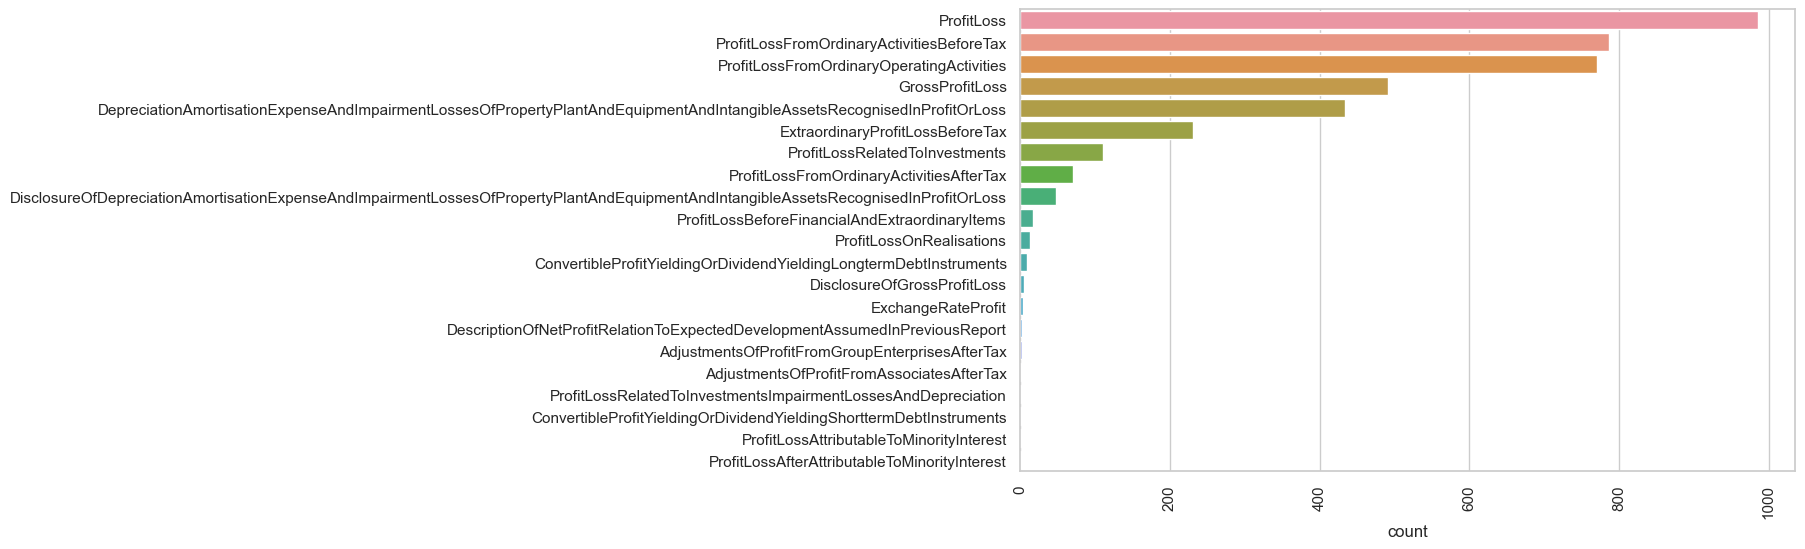

In [61]:
#frequency plot of profit
plt.figure(figsize=(10, 6))
sns.countplot(y=profit, order=pd.Series(profit).value_counts().index)
plt.xticks(rotation=90)
plt.show()

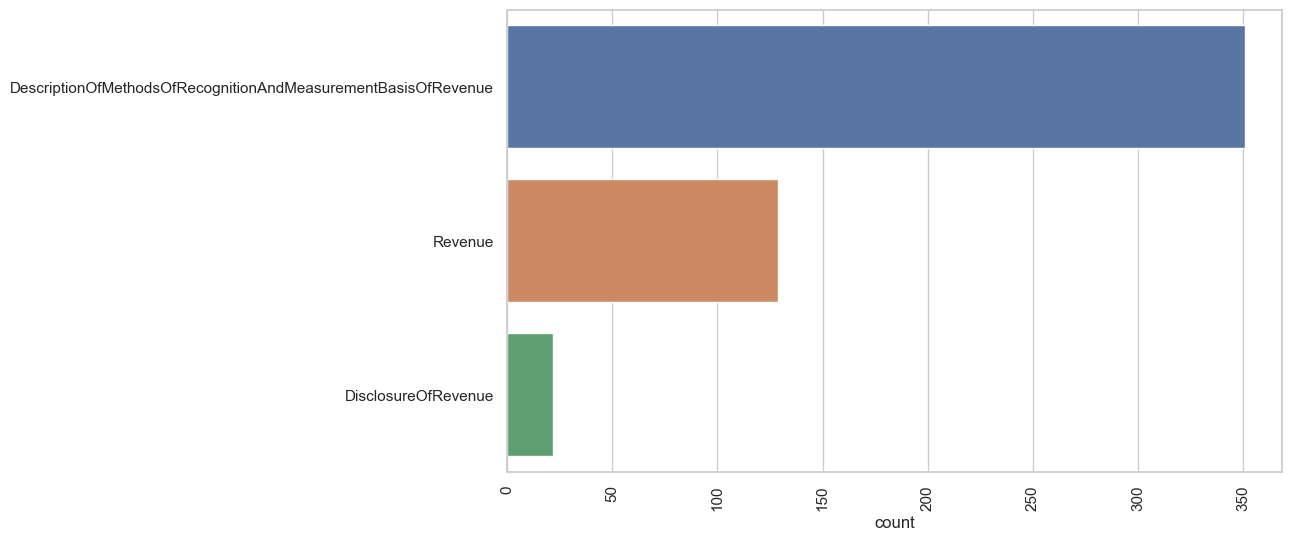

In [60]:
#frequency plot of revenue
plt.figure(figsize=(10, 6))
sns.countplot(y=revenue, order=pd.Series(revenue).value_counts().index)
plt.xticks(rotation=90)
plt.show()

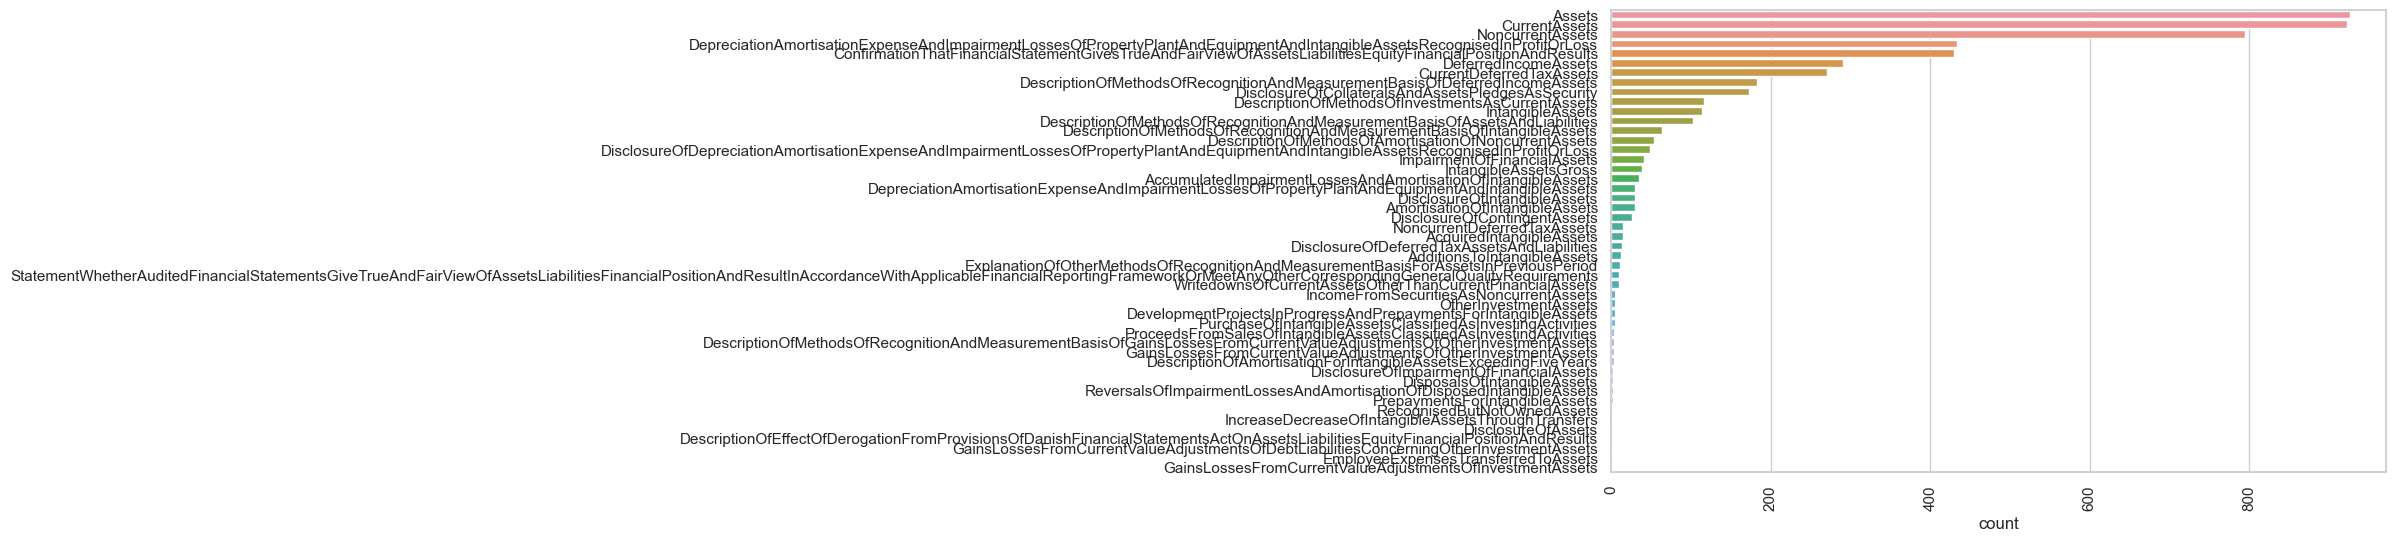

In [62]:
#frequency plot of assets
plt.figure(figsize=(10, 6))
sns.countplot(y=assets, order=pd.Series(assets).value_counts().index)
plt.xticks(rotation=90)
plt.show()

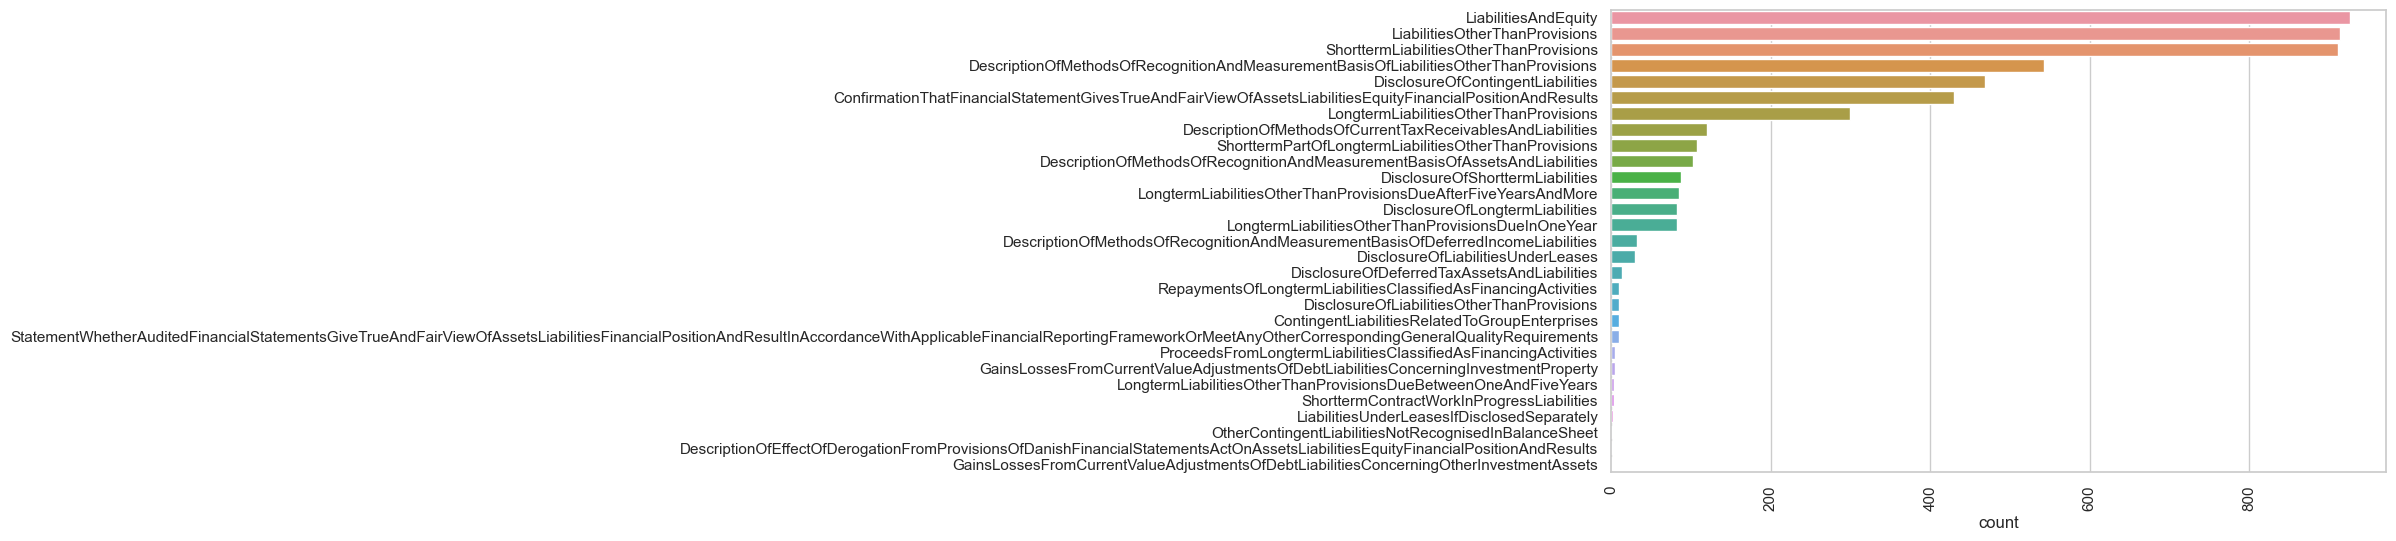

In [63]:
#frequency plot of liabilities
plt.figure(figsize=(10, 6))
sns.countplot(y=liabilities, order=pd.Series(liabilities).value_counts().index)
plt.xticks(rotation=90)
plt.show()

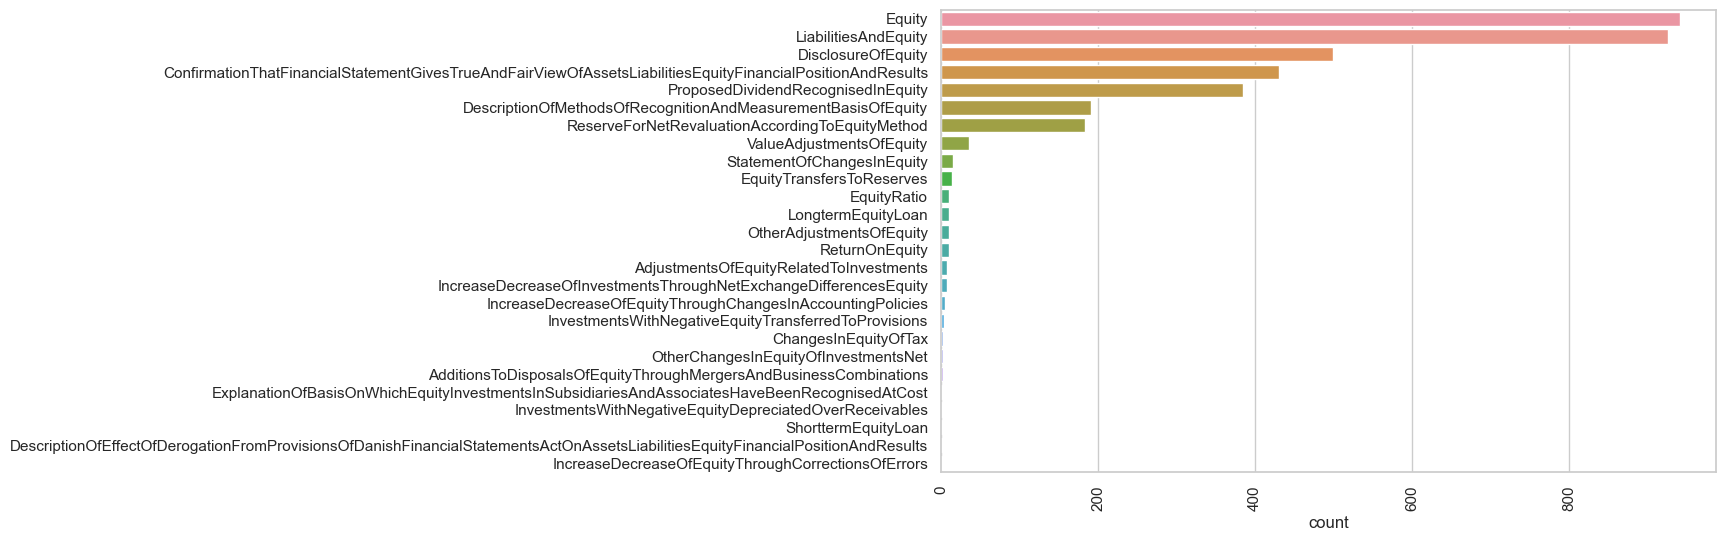

In [64]:
#frequency plot of equity
plt.figure(figsize=(10, 6))
sns.countplot(y=equity, order=pd.Series(equity).value_counts().index)
plt.xticks(rotation=90)
plt.show()

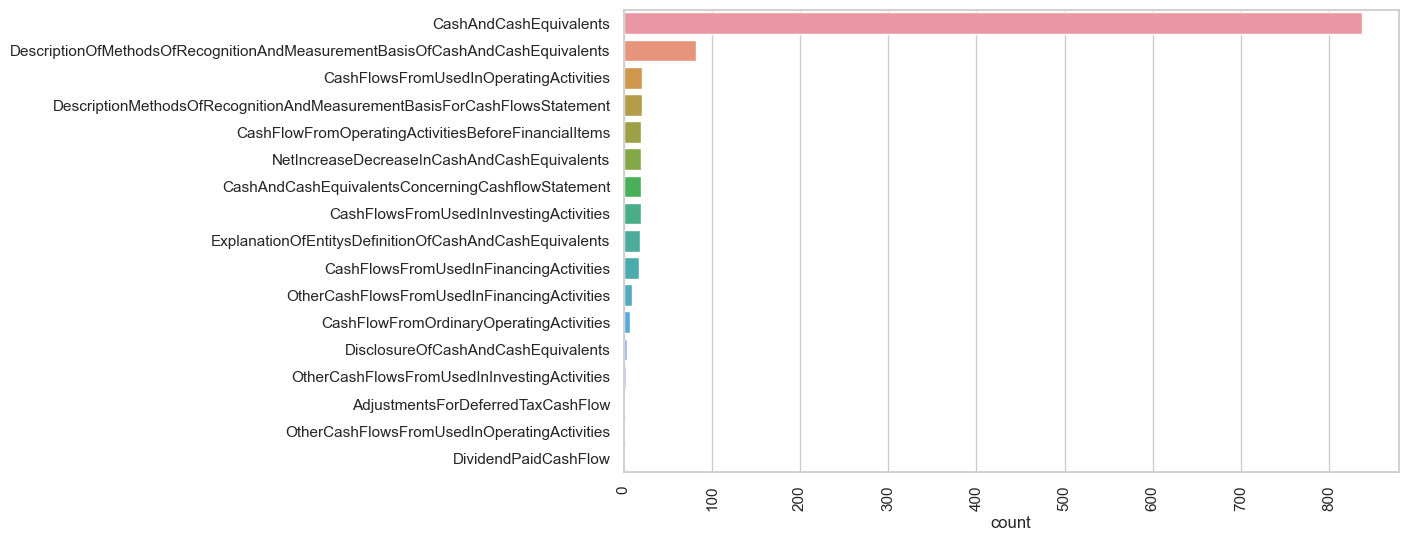

In [65]:
#frequency plot of cash
plt.figure(figsize=(10, 6))
sns.countplot(y=cash, order=pd.Series(cash).value_counts().index)
plt.xticks(rotation=90)
plt.show()

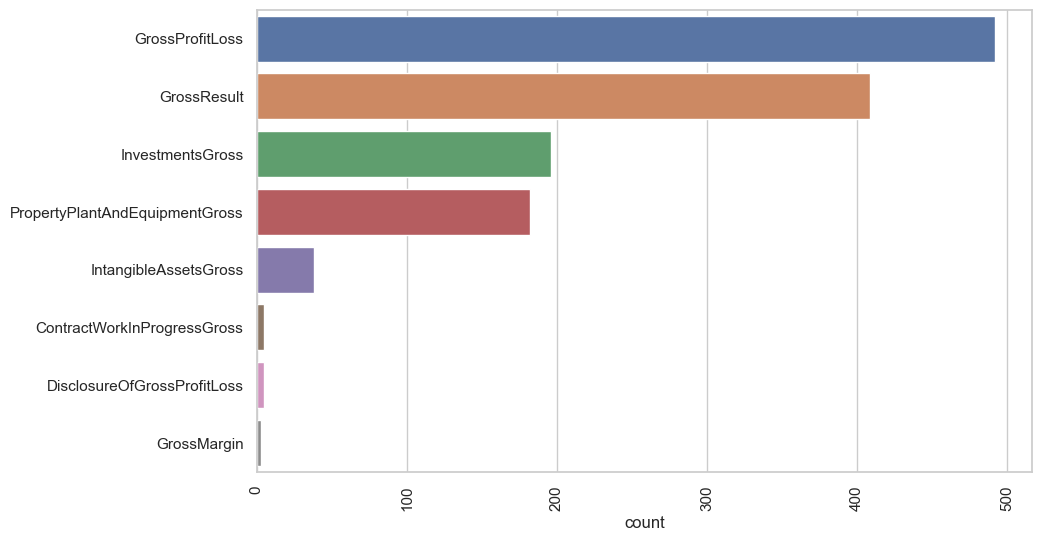

In [66]:
#frequency plot of gross
plt.figure(figsize=(10, 6))
sns.countplot(y=gross, order=pd.Series(gross).value_counts().index)
plt.xticks(rotation=90)
plt.show()

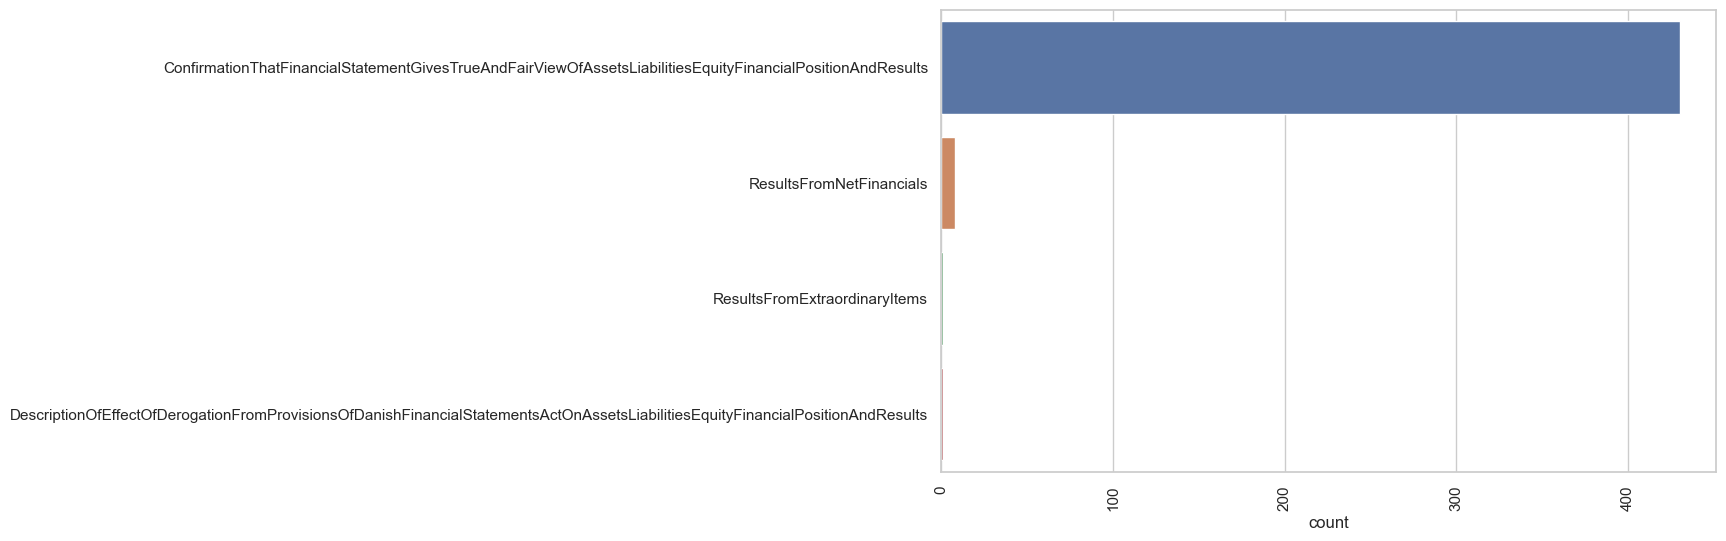

In [73]:
#frequency plot of results
plt.figure(figsize=(10, 6))
sns.countplot(y=results, order=pd.Series(results).value_counts().index)
plt.xticks(rotation=90)
plt.show()

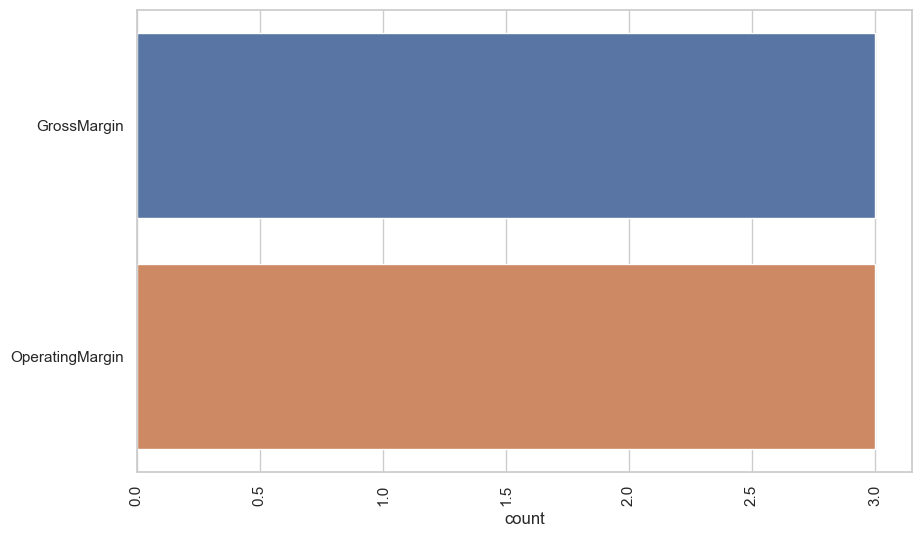

In [75]:
#frequency plot of margin
plt.figure(figsize=(10, 6))
sns.countplot(y=margin, order=pd.Series(margin).value_counts().index)
plt.xticks(rotation=90)
plt.show()

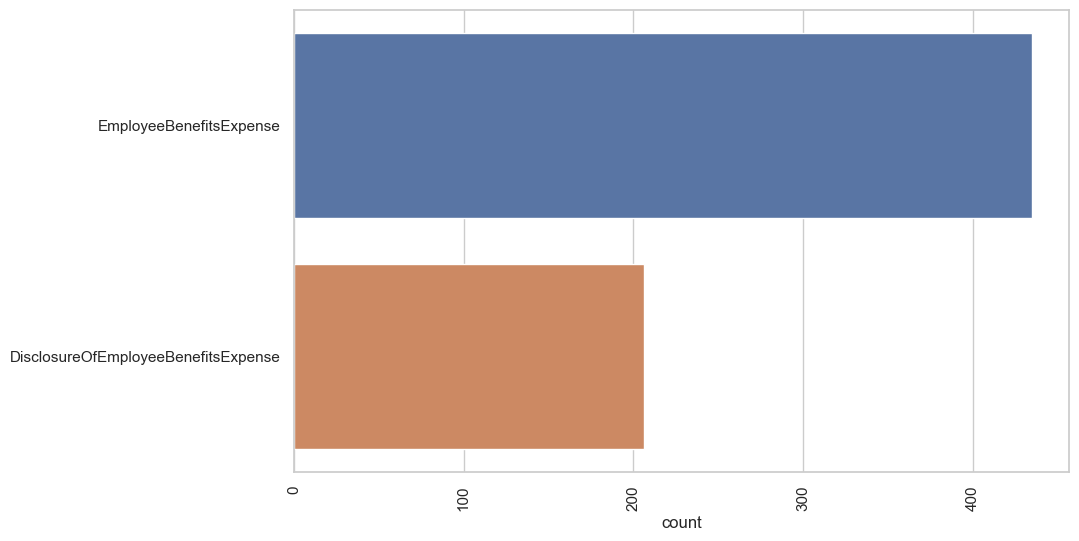

In [77]:
#frequency plot of employee benefits
plt.figure(figsize=(10, 6))
sns.countplot(y=employee_benefits, order=pd.Series(employee_benefits).value_counts().index)
plt.xticks(rotation=90)
plt.show()

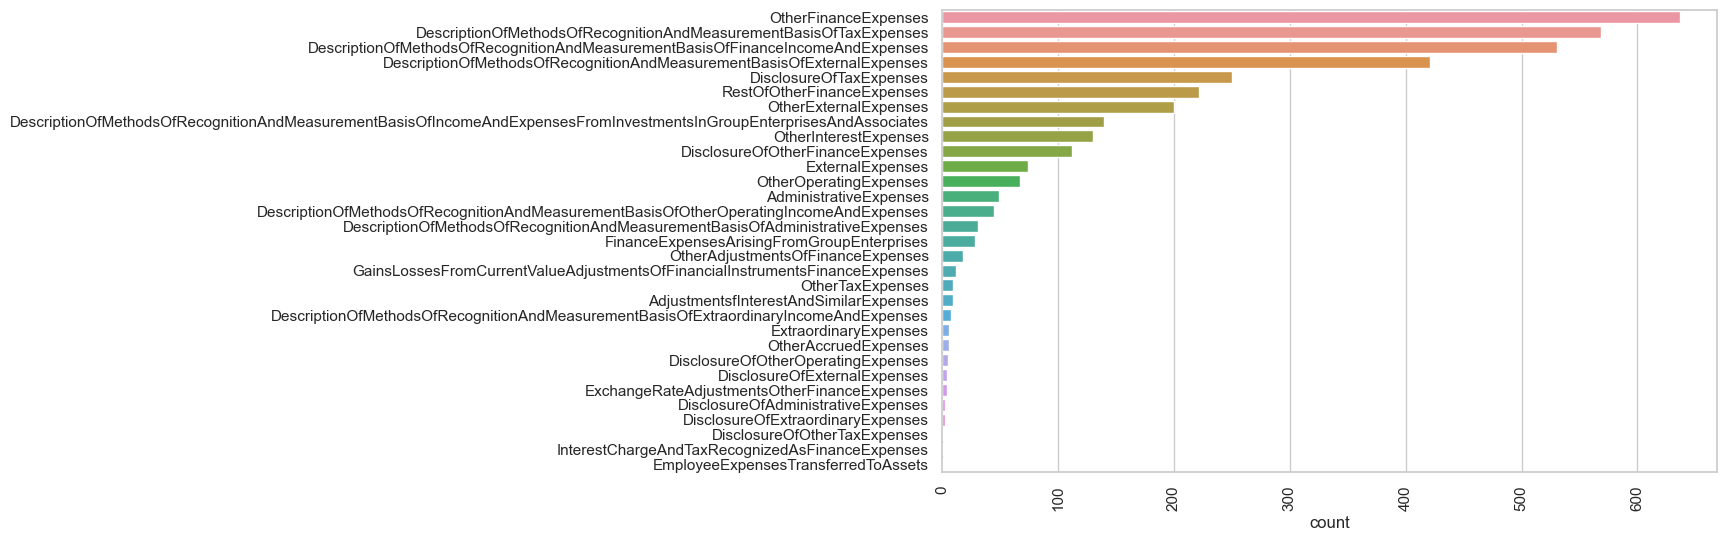

In [79]:
#frequency plot of expenses
plt.figure(figsize=(10, 6))
sns.countplot(y=expenses, order=pd.Series(expenses).value_counts().index)
plt.xticks(rotation=90)
plt.show()

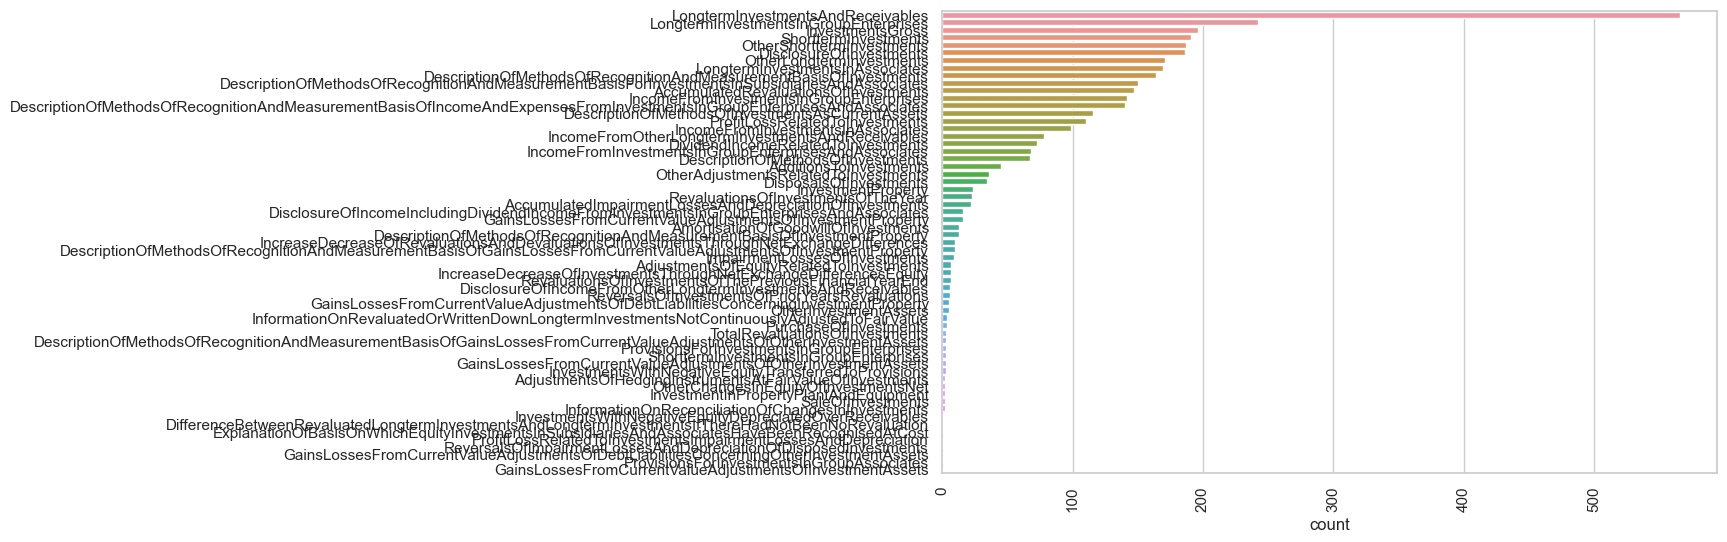

In [80]:
#frequency plot of investment
plt.figure(figsize=(10, 6))
sns.countplot(y=investment, order=pd.Series(investment).value_counts().index)
plt.xticks(rotation=90)
plt.show()

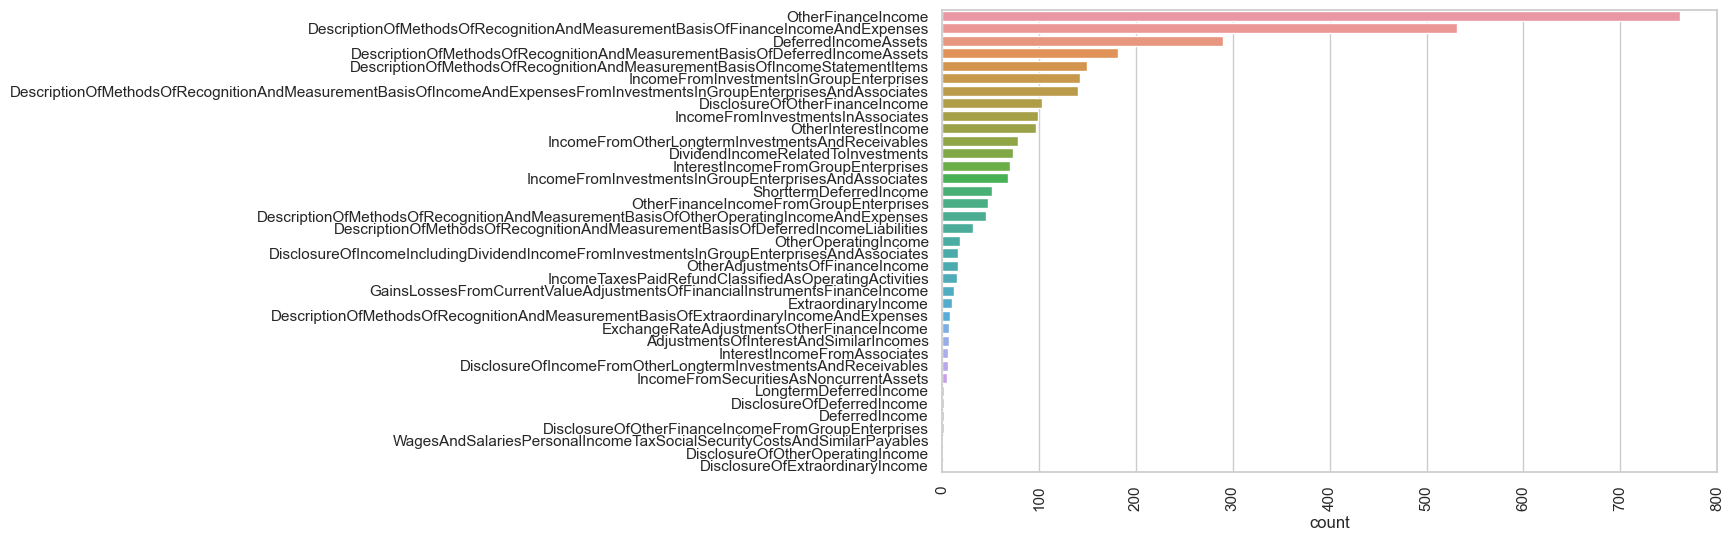

In [81]:
#frequency plot of income
plt.figure(figsize=(10, 6))
sns.countplot(y=income, order=pd.Series(income).value_counts().index)
plt.xticks(rotation=90)
plt.show()

## Unique keys

In [71]:
#find unique values in corpus
corpus_unique = list(set(corpus))
print('Number of unique values in corpus:', len(corpus_unique))

Number of unique values in corpus: 693


In [25]:
#frequency table of corpus
pd.Series(corpus).value_counts()

NameOfAuditFirm                                                                                  1442
ReportingPeriodEndDate                                                                           1000
schemaRef                                                                                        1000
NameOfReportingEntity                                                                            1000
IdentificationNumberCvrOfReportingEntity                                                         1000
                                                                                                 ... 
RetrospectiveInformationOnContributedCapital                                                        1
ExplanationOfBasisOnWhichEquityInvestmentsInSubsidiariesAndAssociatesHaveBeenRecognisedAtCost       1
LongtermReceivablesFromOwnersAndManagement                                                          1
PrepaymentsReceivedFromCustomers                                                  

In [36]:
#print values that only appear once

unique_values = pd.Series(corpus).value_counts()
print("Number of unique values with 1 occurence: ", len(unique_values[unique_values == 1]))
print("Number of unique values with 100% occurences: ", len(unique_values[unique_values >= len(df)]))


Number of unique values with 1 occurence:  81
Number of unique values with 100% occurences:  12


In [40]:
#convert unique values to dataframe
unique_values = pd.DataFrame(unique_values)
unique_values.reset_index(inplace=True)
unique_values.columns = ['value', 'count']


In [45]:
unique_values[unique_values['count'] == 1]['value'].values

array(['InformationOnConsolidations',
       'DescriptionOfImpactOnExternalEnvironmentAndMeasuresOfPreventingReducingOrMitigatingDamage',
       'DisclosureOfAssets', 'InformationOnMinorityInterests',
       'ProfitLossAfterAttributableToMinorityInterest',
       'NominalValueOfTreasurySharesHold',
       'ProfitLossAttributableToMinorityInterest', 'MinorityInterests',
       'CostRelatedToIncreaseOfCapital',
       'ReversalsOfRevaluationsOfDisposedPropertyPlantAndEquipment',
       'ProvisionsForInvestmentsInGroupAssociates',
       'EmployeeExpensesTransferredToAssets',
       'RemunerationOfManagementCategories',
       'ExplanationOfNotDisclosingInformationOnSubsidiariesAssociatesPartnershipOrLimitedPartnershipEntitiesInWhichReportingEntityIsPartnerOrGeneralPartner',
       'AcquiredOtherSimilarRights', 'OtherAdjustments',
       'InformationOnSegments', 'InformationOnAverageNumberOfEmployees',
       'InterestChargeAndTaxRecognizedAsFinanceExpenses',
       'DisclosureOfCostOfSal

## Plot of keys > 500 instances

In [21]:
#create frequency table of corpus values with more than 500 occurrences

test = pd.Series(corpus).value_counts()[pd.Series(corpus).value_counts() > 500]


#pd.Series(corpus).value_counts()[pd.Series(corpus).value_counts() > 500].plot(kind='bar')
#pd.Series(corpus).value_counts().plot(kind='bar')

<AxesSubplot:>

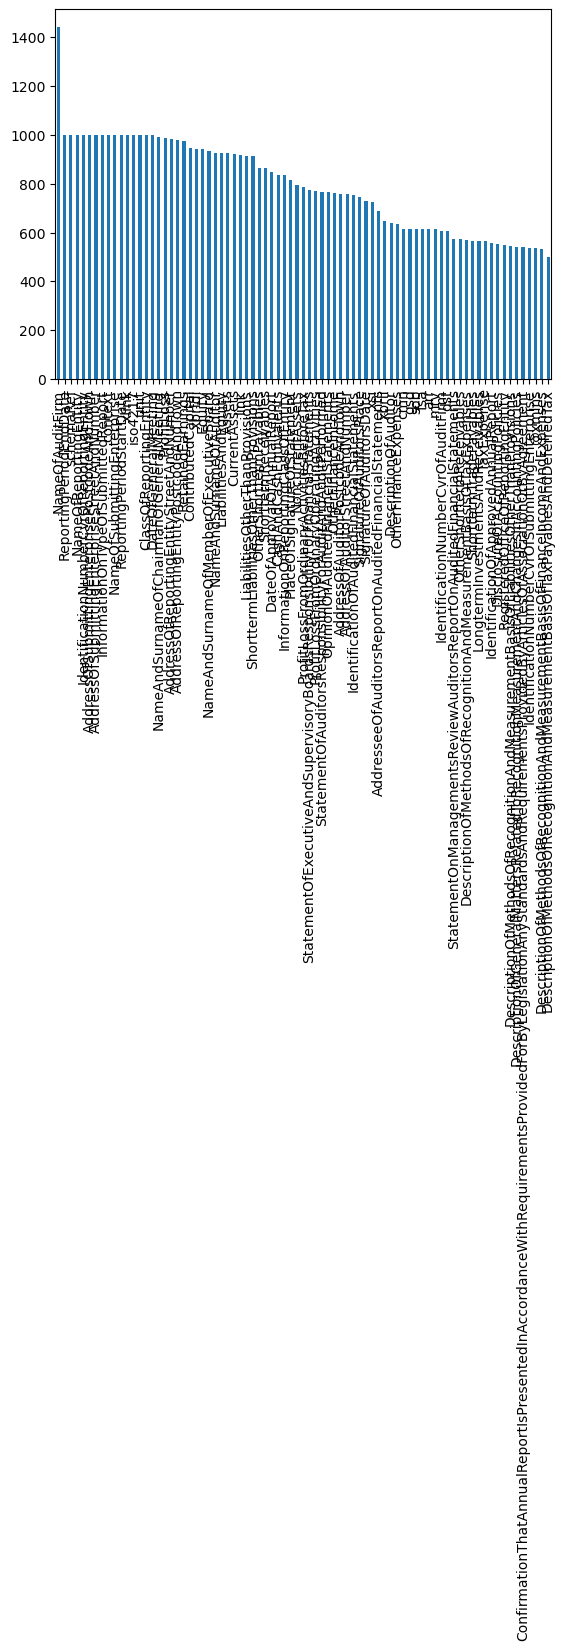

In [22]:
test.plot(kind='bar')